In [18]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_dir = 'D:\\CAREER RELATED\\PROJECTS\\Diseases\\data\\data\\train'
test_dir = 'D:\\CAREER RELATED\\PROJECTS\\Diseases\\data\\data\\test'

In [28]:
def load_images_and_labels(directory, target_size=(64,64), max_per_class=100):
    images = []
    labels = []
    class_names = os.listdir(directory)
    for class_name in class_names:
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            count = 0
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                img = image.load_img(img_path, target_size=target_size)
                img_array = image.img_to_array(img)
                img_array = img_array.flatten() / 255.0  # Flatten and normalize
                images.append(img_array)
                labels.append(class_name)
                
                count += 1
                if count >= max_per_class:
                    break
                    
    return np.array(images), np.array(labels)

# Load train data (example usage)
X_train, y_train = load_images_and_labels(train_dir, max_per_class=100)


In [29]:
X_train, y_train = load_images_and_labels(train_dir, max_per_class=100)

In [30]:
X_test, y_test = load_images_and_labels(test_dir,max_per_class=100)
print(f"Train samples: {X_train.shape}, Test samples: {X_test.shape}")

Train samples: (400, 12288), Test samples: (400, 12288)


In [31]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Initialize and train ML model (Support Vector Machine)
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train_scaled, y_train_enc)


SVC()

Classification Report:
                     precision    recall  f1-score   support

       Coccidiosis       0.73      0.59      0.65       100
           Healthy       0.46      0.64      0.53       100
New Castle Disease       0.48      0.22      0.30       100
        Salmonella       0.38      0.50      0.43       100

          accuracy                           0.49       400
         macro avg       0.51      0.49      0.48       400
      weighted avg       0.51      0.49      0.48       400



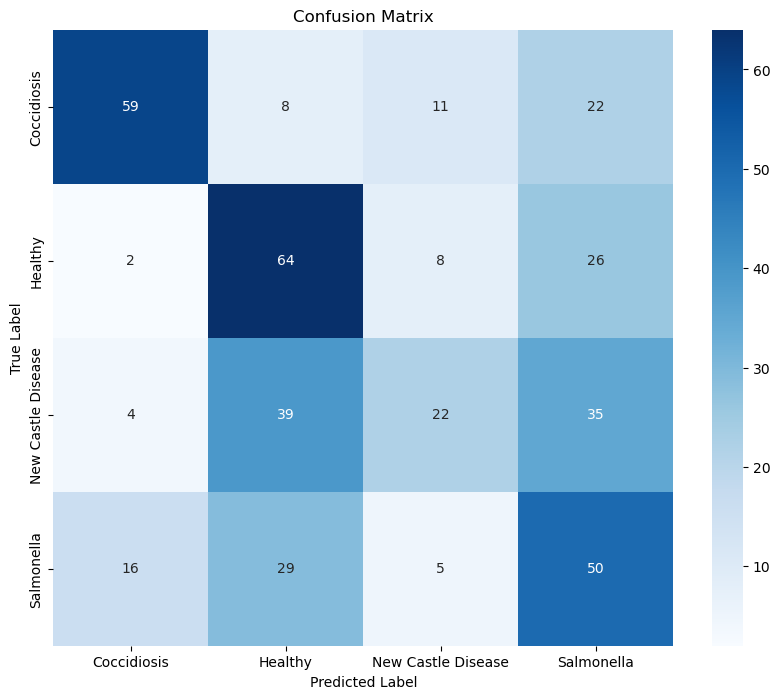

In [33]:
# Evaluate model
y_pred = model.predict(X_test_scaled)

# Classification report
target_names = le.classes_
report = classification_report(y_test_enc, y_pred, target_names=target_names)
print("Classification Report:\n", report)

# Confusion matrix
cm = confusion_matrix(y_test_enc, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [35]:
def predict_image_ml(img_path, model, scaler, label_encoder, target_size=(64,64)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img).flatten() / 255.0
    img_scaled = scaler.transform([img_array])
    prediction = model.predict(img_scaled)
    class_label = label_encoder.inverse_transform(prediction)[0]
    return class_label

# Example usage with raw string
img_path = r"D:\CAREER RELATED\PROJECTS\Diseases\data\data\test\Salmonella\pcrsalmo.0.jpg_aug34.JPG"
label = predict_image_ml(img_path, model, scaler, le)
print(f"Predicted: {label}")


Predicted: Salmonella


In [36]:
img_path = r"D:\CAREER RELATED\PROJECTS\Diseases\data\data\test\Healthy\healthy.1.jpg"
label = predict_image_ml(img_path, model, scaler, le)
print(f"Predicted: {label}")

Predicted: Healthy


In [37]:
img_path = r"D:\CAREER RELATED\PROJECTS\Diseases\data\data\test\New Castle Disease\ncd.0.jpg_aug10.JPG"
label = predict_image_ml(img_path, model, scaler, le)
print(f"Predicted: {label}")

Predicted: New Castle Disease


In [38]:

img_path = r"D:\CAREER RELATED\PROJECTS\Diseases\data\data\test\Coccidiosis\cocci.1.jpg_aug5.JPG"
label = predict_image_ml(img_path, model, scaler, le)
print(f"Predicted: {label}")

Predicted: Coccidiosis


In [39]:
model.save('D:\CAREER RELATED\PROJECTS\PoultryDiseases.h5')

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\badbo\AppData\Local\Temp\ipykernel_20548\63453242.py:1: SyntaxWarning: invalid escape sequence '\C'
  model.save('D:\CAREER RELATED\PROJECTS\PoultryDiseases.h5')
C:\Users\badbo\AppData\Local\Temp\ipykernel_20548\63453242.py:1: SyntaxWarning: invalid escape sequence '\C'
  model.save('D:\CAREER RELATED\PROJECTS\PoultryDiseases.h5')


AttributeError: 'SVC' object has no attribute 'save'